##GRIP Task 1


Importing required Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

Importing and Reading the Data

In [2]:
data_url = r"/content/drive/My Drive/Sparks Foundation GRIP/studentscores.csv"

In [3]:
data = pd.read_csv(data_url)
#Let's view the first five rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###Data Visualization

In [4]:
x_axis_data = data[["Hours"]]
y_axis_data = data[["Scores"]]

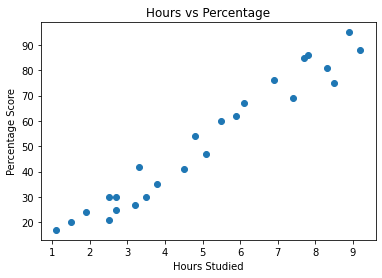

In [5]:
#Plot the hours data against the scores data
plt.scatter(x_axis_data, y_axis_data)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Here, there is a linear relationship between the x-axis data and the y-axis data i.e., as the number of hours increases, the percentage score also increases. So, linear regression is the correct fit for the given data.


###Exploratory Data Analysis - EDA

In [6]:
x_data = data.iloc[:, :-1].values  
y_data = data.iloc[:, 1].values

Dividing the Train data and Test Data

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                            test_size=0.2, random_state=0) 

###Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression  
#Create a Linear Regression Object
lr = LinearRegression()  
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training of the Linear Regression model is completed. See the coefficients.

---



In [9]:
print(lr.coef_, lr.intercept_)

[9.91065648] 2.018160041434662


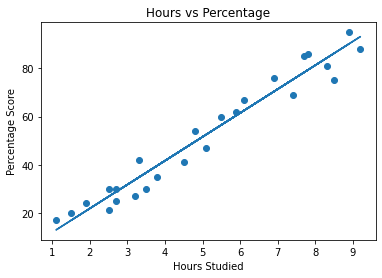

In [10]:
#Now, lets draw the regression line.
#This can be done in two ways.
#Method 1
reg_line = lr.coef_*x_data + lr.intercept_
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.scatter(x_data, y_data)
plt.plot(x_data, reg_line)
plt.show()

###Predictions

In [11]:
#First, print the actual test data values
print(y_test)

[20 27 69 30 62]


In [12]:
#Now, Let us make predictions
y_pred_data = lr.predict(x_test)

In [13]:
print(y_pred_data)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
actual_vs_pred_data = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_pred_data})
actual_vs_pred_data

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###Evaluation of the Model
This is to evaluate the performance of the model, i.e., to see how our model is performing on the unseen data or the real world data. 

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_data))

Mean Absolute Error: 4.183859899002982
